# Axis Bank stock Data Analysys-1

## Import Necessary Libraries

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Stock data Download

In [2]:
# Define the start and end dates for data download
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2024, 11, 26)
symbol = 'AXISBANK.NS'

In [3]:
# Download historical stock data using yfinance
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Reset index to include the Date column
stk_data.reset_index(inplace=True)

In [5]:
stk_data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
0,2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243
1,2021-06-02,733.802734,737.000000,745.299988,734.200012,744.799988,9973043
2,2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508
3,2021-06-04,738.830872,742.049988,759.900024,740.099976,751.000000,10336011
4,2021-06-07,747.841614,751.099976,753.950012,741.500000,743.099976,6986728
...,...,...,...,...,...,...,...
857,2024-11-18,1126.199951,1126.199951,1135.000000,1121.550049,1131.199951,9474971
858,2024-11-19,1133.949951,1133.949951,1139.000000,1122.050049,1130.000000,19225966
859,2024-11-21,1139.150024,1139.150024,1152.000000,1115.750000,1138.000000,8126248


In [6]:
# Drop any unwanted row (like a Ticker row if exists)
# This ensures only the actual data rows are kept
stk_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
stk_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243
1,2021-06-02,733.802734,737.000000,745.299988,734.200012,744.799988,9973043
2,2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508
3,2021-06-04,738.830872,742.049988,759.900024,740.099976,751.000000,10336011
4,2021-06-07,747.841614,751.099976,753.950012,741.500000,743.099976,6986728
...,...,...,...,...,...,...,...
857,2024-11-18,1126.199951,1126.199951,1135.000000,1121.550049,1131.199951,9474971
858,2024-11-19,1133.949951,1133.949951,1139.000000,1122.050049,1130.000000,19225966
859,2024-11-21,1139.150024,1139.150024,1152.000000,1115.750000,1138.000000,8126248
860,2024-11-22,1142.400024,1142.400024,1147.900024,1127.550049,1136.650024,16687505


## Save--DataFrame to a CSV

In [8]:
# Save the DataFrame to a CSV file
stk_data.to_csv('axisbank_stock_data.csv', index=False)

print("Data has been successfully saved to 'axisbank_stock_data.csv'.")

Data has been successfully saved to 'axisbank_stock_data.csv'.


In [9]:
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243
1,2021-06-02,733.802734,737.000000,745.299988,734.200012,744.799988,9973043
2,2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508
3,2021-06-04,738.830872,742.049988,759.900024,740.099976,751.000000,10336011
4,2021-06-07,747.841614,751.099976,753.950012,741.500000,743.099976,6986728


In [10]:
stk_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
857,2024-11-18,1126.199951,1126.199951,1135.000000,1121.550049,1131.199951,9474971
858,2024-11-19,1133.949951,1133.949951,1139.000000,1122.050049,1130.000000,19225966
859,2024-11-21,1139.150024,1139.150024,1152.000000,1115.750000,1138.000000,8126248
860,2024-11-22,1142.400024,1142.400024,1147.900024,1127.550049,1136.650024,16687505
861,2024-11-25,1155.900024,1155.900024,1164.500000,1142.000000,1160.000000,12385823


## Check Basic Information

In [11]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       862 non-null    datetime64[ns]
 1   Open       862 non-null    float64       
 2   High       862 non-null    float64       
 3   Low        862 non-null    float64       
 4   Close      862 non-null    float64       
 5   Adj Close  862 non-null    float64       
 6   Volume     862 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 47.3 KB


In [12]:
stk_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
stk_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Categorizing Numerical and Categorical Columns

In [14]:
def segregate_columns(dataset):
    quantitative = []
    qualitative = []

    for col in dataset.columns:
        if dataset[col].dtypes == 'object':
            qualitative.append(col)
        else:
            quantitative.append(col)

    print("Quantitative Data:", quantitative)
    print("Qualitative Data:", qualitative)
    return quantitative, qualitative

In [15]:
quan, qual=segregate_columns(stk_data)

Quantitative Data: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Qualitative Data: []


## Statistical Summary

In [16]:
def descriptive_analysis(dataset, quan):
    des_data = pd.DataFrame(index=[
        "Null_count", "NonNull_count", "Total_Count", "Mean", "Median", "Mode", 
        "Std", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", "1.5Rule", 
        "Lesser", "Greater"
    ], columns=quan)

    for col in quan:
        des_data[col]["Null_count"] = dataset[col].isnull().sum()
        des_data[col]["NonNull_count"] = dataset[col].count()
        des_data[col]["Total_Count"] = len(dataset[col])
        des_data[col]["Mean"] = dataset[col].mean()
        des_data[col]["Median"] = dataset[col].median()
        des_data[col]["Mode"] = dataset[col].mode()[0] if not dataset[col].mode().empty else None
        des_data[col]["Std"] = dataset[col].std()
        des_data[col]["Min"] = dataset[col].min()
        des_data[col]["Q1:25%"] = dataset[col].quantile(0.25)
        des_data[col]["Q2:50%"] = dataset[col].quantile(0.5)
        des_data[col]["Q3:75%"] = dataset[col].quantile(0.75)
        des_data[col]["Q4:100%"] = dataset[col].max()
        des_data[col]["IQR"] = des_data[col]["Q3:75%"] - des_data[col]["Q1:25%"]
        des_data[col]["1.5Rule"] = 1.5 * des_data[col]["IQR"]
        des_data[col]["Lesser"] = des_data[col]["Q1:25%"] - des_data[col]["1.5Rule"]
        des_data[col]["Greater"] = des_data[col]["Q3:75%"] + des_data[col]["1.5Rule"]

    return des_data


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
des_analysys=descriptive_analysis(stk_data, quan)

In [19]:
des_analysys

,Date,Open,High,Low,Close,Adj Close,Volume
Null_count,0,0,0,0,0,0,0
NonNull_count,862,862,862,862,862,862,862
Total_Count,862,862,862,862,862,862,862
Mean,2023-02-23 17:14:03.619489280,911.499598,913.44327,923.120071,903.677782,913.759107,9830701.865429
Median,2023-02-20 12:00:00,885.49353,888.0,897.475006,877.524994,887.850006,8450320.5
Mode,2021-06-01 00:00:00,743.112183,746.349976,749.0,776.0,759.0,460781
Std,368 days 09:22:05.977248744,177.753135,176.759759,178.161852,175.297616,176.68299,5359285.319421
Min,2021-06-01 00:00:00,622.836304,625.549988,633.650024,618.25,624.0,460781
Q1:25%,2022-04-11 06:00:00,752.147873,755.250015,762.0,746.0625,755.0,6602609.5
Q2:50%,2023-02-20 12:00:00,885.49353,888.0,897.475006,877.524994,887.850006,8450320.5


## Percentile Analysis

In [20]:
import numpy as np
np.percentile(stk_data['Low'],99)

1295.1560095214843

In [21]:
np.percentile(stk_data['High'],99)

1288.278966064453

## PDF Probability Calculation

In [22]:
def get_pdf_probability(dataset,startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True, kde_kws={'color': 'blue'}, color='Green')
    pyplot. axvline(startrange, color='Red')
    pyplot. axvline(endrange, color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({}, {}):{}".format(startrange, endrange, sum(probabilities)))
    return prob

Mean=923.120, Standard Deviation=178.162
The area between range(800, 1200):0.6957001167377802


0.6957001167377802

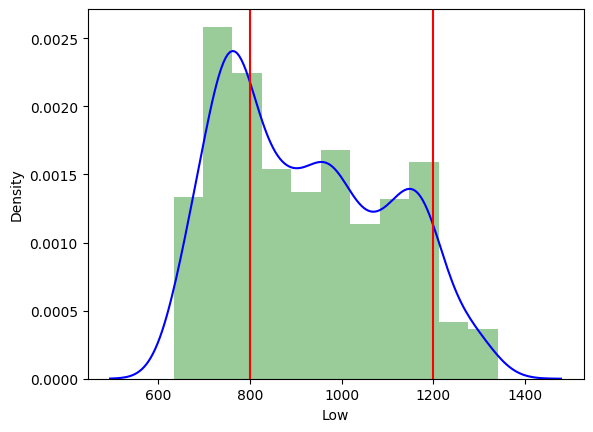

In [23]:
get_pdf_probability(stk_data['Low'],800,1200)

## Frequency Table Calculation

In [24]:
def freqTable(columnName, dataset):
    # Calculate the value counts for the given column
    value_counts = dataset[columnName].value_counts()
    
    # Create a DataFrame to store the frequency table
    frq = pd.DataFrame({
        "Unique_Values": value_counts.index,
        "Frequency": value_counts.values,
        "Relative_Fre": value_counts.values / len(dataset[columnName]) * 100
    })
    
    # Calculate cumulative frequency
    frq["Cumulative"] = frq["Relative_Fre"].cumsum()
    
    return frq

In [25]:
freqTable("Low",stk_data)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,755.000000,3,0.348028,0.348028
1,1178.000000,3,0.348028,0.696056
2,762.000000,3,0.348028,1.044084
3,764.000000,3,0.348028,1.392111
4,801.000000,3,0.348028,1.740139
...,...,...,...,...
796,734.900024,1,0.116009,99.535963
797,753.549988,1,0.116009,99.651972
798,754.900024,1,0.116009,99.767981
799,754.549988,1,0.116009,99.883991


In [26]:
fh=freqTable("Low",stk_data)

In [27]:
fh.sort_values(by="Frequency",ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,755.000000,3,0.348028,0.348028
5,749.000000,3,0.348028,2.088167
8,760.000000,3,0.348028,3.132251
7,1194.000000,3,0.348028,2.784223
6,789.000000,3,0.348028,2.436195
...,...,...,...,...
302,1219.550049,1,0.116009,42.227378
303,1234.000000,1,0.116009,42.343387
304,1240.599976,1,0.116009,42.459397
305,1250.400024,1,0.116009,42.575406


In [28]:
freqTable("Close",stk_data)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,776.000000,4,0.464037,0.464037
1,741.000000,3,0.348028,0.812065
2,725.000000,3,0.348028,1.160093
3,732.000000,3,0.348028,1.508121
4,928.049988,2,0.232019,1.740139
...,...,...,...,...
806,733.799988,1,0.116009,99.535963
807,742.000000,1,0.116009,99.651972
808,722.049988,1,0.116009,99.767981
809,733.000000,1,0.116009,99.883991


In [29]:
freqTable("Open",stk_data)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,743.112183,3,0.348028,0.348028
1,830.997742,2,0.232019,0.580046
2,959.159790,2,0.232019,0.812065
3,926.078674,2,0.232019,1.044084
4,947.069275,2,0.232019,1.276102
...,...,...,...,...
826,756.708069,1,0.116009,99.535963
827,758.403198,1,0.116009,99.651972
828,762.491760,1,0.116009,99.767981
829,769.920654,1,0.116009,99.883991


## Statistical Summary

In [30]:
Close_series = stk_data['Close']

In [31]:
Close_series

0       741.150024
1       734.200012
2       739.000000
3       740.099976
4       741.500000
          ...     
857    1121.550049
858    1122.050049
859    1115.750000
860    1127.550049
861    1142.000000
Name: Close, Length: 862, dtype: float64

In [32]:
import scipy.stats as stats

# Assuming Close_series is your pandas Series
mean = Close_series.mean()
median = Close_series.median()
mode = Close_series.mode().iloc[0]  # Ensure it's a scalar value
skewness = stats.skew(Close_series)
kurtosis = stats.kurtosis(Close_series)
std_dev = Close_series.std()

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)
print("Standard Deviation:", std_dev)


Mean: 903.677782027738
Median: 877.5249938964844
Mode: 776.0
Skewness: 0.32289188870981916
Kurtosis: -1.0540420634264411
Standard Deviation: 175.29761613419194


## Close Price Distribution

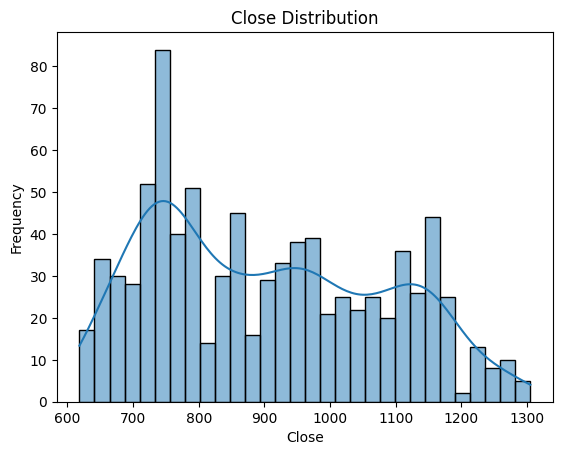

In [33]:
# Revenue distribution
sns.histplot(stk_data['Close'], kde=True, bins=30)
plt.title('Close Distribution')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

## Lowest & Highest Revenue

In [34]:
# Lowest revenue
low_revenue = stk_data['Close'].min()
print("Lowest Close Value:", low_revenue)

# Highest revenue
high_revenue = stk_data['Close'].max()
print("Highest close Value:", high_revenue)

Lowest Close Value: 618.25
Highest close Value: 1305.0


## Probability Calculation

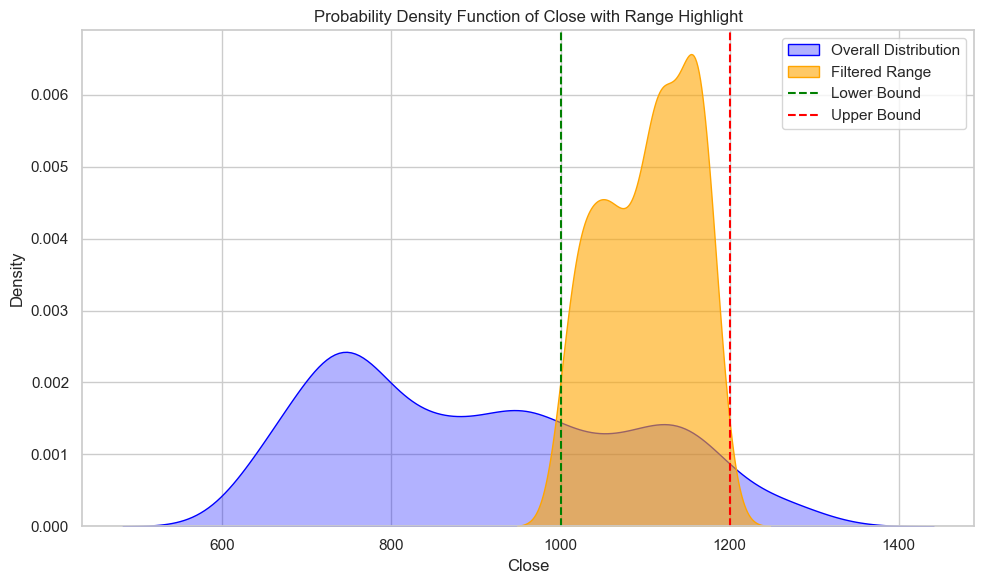

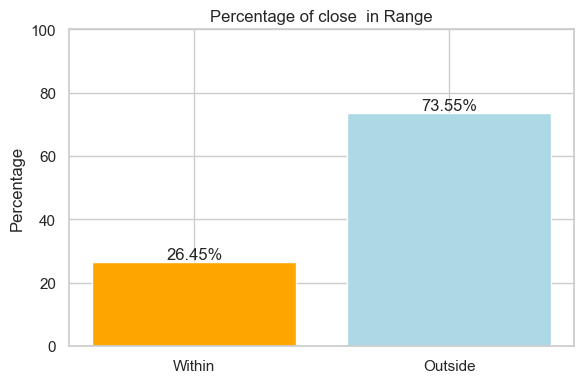

In [35]:
# Define the range for filtering
lower_bound = 1000
upper_bound = 1200

# Calculate the percentage of values within the specified range
filtered_data = Close_series[(Close_series >= lower_bound) & (Close_series <= upper_bound)]
percentage_in_range = (len(filtered_data) / len(Close_series)) * 100

sns.set(style="whitegrid")

# Create the figure for KDE
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function in the specified range
sns.kdeplot(Close_series, color='blue', fill=True, alpha=0.3, label='Overall Distribution')
sns.kdeplot(filtered_data, color='orange', fill=True, alpha=0.6, label='Filtered Range')

# Add vertical lines for the range
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')

# Add titles and labels
plt.title('Probability Density Function of Close with Range Highlight')
plt.xlabel('Close')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Create a bar plot for percentage representation
plt.figure(figsize=(6, 4))
plt.bar(['Within', 'Outside'], [percentage_in_range, 100 - percentage_in_range], color=['orange', 'lightblue'])
plt.title('Percentage of close  in Range')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Show the percentage value on top of the bars
for index, value in enumerate([percentage_in_range, 100 - percentage_in_range]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the bar plot
plt.tight_layout()
plt.show()

## Normal Distribution

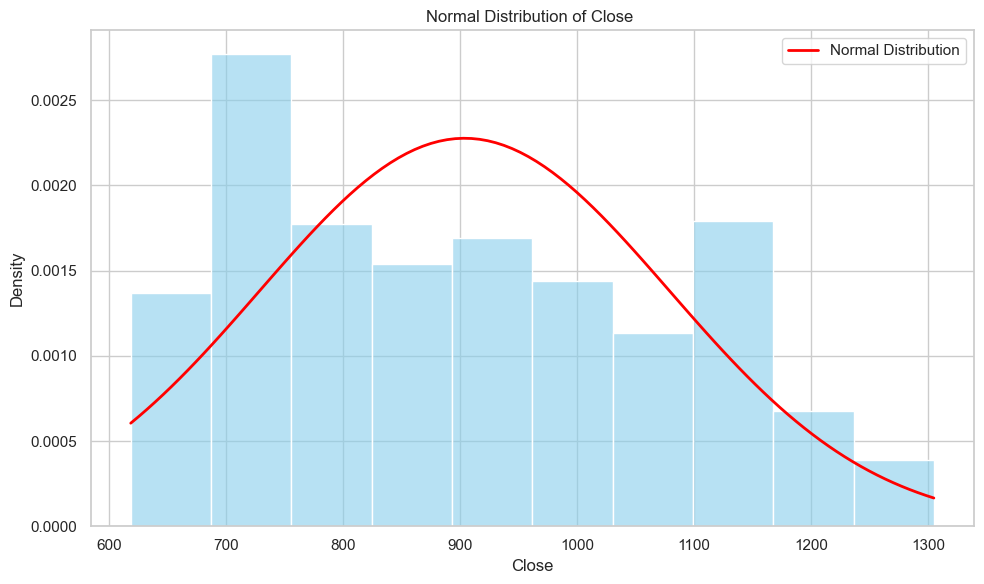

In [36]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(Close_series, bins=10, kde=False, color='skyblue', stat="density", alpha=0.6)

# Generate the x values for the normal distribution curve
x = np.linspace(Close_series.min(), Close_series.max(), 100)
# Calculate the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)

# Add titles and labels
plt.title('Normal Distribution of Close ')
plt.xlabel('Close')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Co-variance

In [37]:
stk_data.cov(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,3.159618e+04,3.141942e+04,3.163628e+04,3.112868e+04,3.132909e+04,1.688923e+07
High,3.141942e+04,3.124401e+04,3.145933e+04,3.095449e+04,3.115374e+04,1.692270e+07
Low,3.163628e+04,3.145933e+04,3.174165e+04,3.118796e+04,3.144424e+04,2.933371e+07
Close,3.112868e+04,3.095449e+04,3.118796e+04,3.072925e+04,3.093127e+04,2.604735e+06
Adj Close,3.132909e+04,3.115374e+04,3.144424e+04,3.093127e+04,3.121688e+04,1.624835e+07
Volume,1.688923e+07,1.692270e+07,2.933371e+07,2.604735e+06,1.624835e+07,2.872194e+13


## Co-Relation

In [38]:
corr_matrix=stk_data.corr(numeric_only=True)

In [39]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999994,0.998972,0.999005,0.997552,0.017729
High,0.999994,1.000000,0.998968,0.998997,0.997544,0.017864
Low,0.998972,0.998968,1.000000,0.998611,0.998922,0.030722
Close,0.999005,0.998997,0.998611,1.000000,0.998682,0.002773
Adj Close,0.997552,0.997544,0.998922,0.998682,1.000000,0.017160
Volume,0.017729,0.017864,0.030722,0.002773,0.017160,1.000000


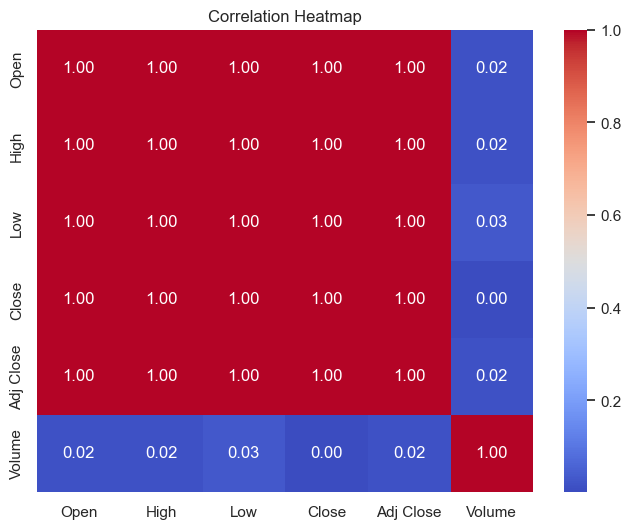

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Price Gap Analysis

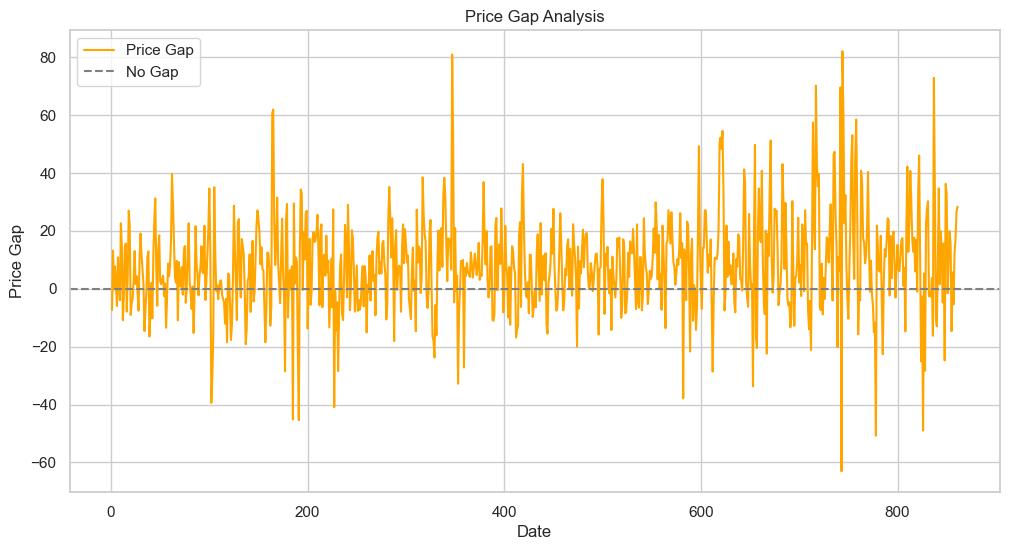

In [41]:
stk_data['Price Gap'] = stk_data['Open'] - stk_data['Close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(stk_data['Price Gap'], label='Price Gap', color='orange')
plt.axhline(0, linestyle='--', color='gray', label='No Gap')
plt.title('Price Gap Analysis')
plt.xlabel('Date')
plt.ylabel('Price Gap')
plt.legend()
plt.show()


In [42]:
stk_data['Price Gap']

0            NaN
1      -7.347290
2      13.193604
3      -0.169128
4       7.741638
         ...    
857    -5.400024
858    12.399902
859    17.099976
860    26.650024
861    28.349976
Name: Price Gap, Length: 862, dtype: float64

In [43]:
# Detect the day with the highest price gap
highest_gap_day = stk_data.loc[stk_data['Price Gap'].idxmax()]
print("Day with the Highest Price Gap:")
print(highest_gap_day)

# Sort the data by 'Price Gap' in ascending to descending order
sorted_data = stk_data.sort_values(by='Price Gap', ascending=False)
print("\nData Sorted by Price Gap (Descending):")
print(sorted_data[['Open', 'Close', 'Price Gap']].head())

# To reverse the order to ascending:
sorted_data_asc = stk_data.sort_values(by='Price Gap', ascending=True)
print("\nData Sorted by Price Gap (Ascending):")
print(sorted_data_asc[['Open', 'Close', 'Price Gap']].head())


Day with the Highest Price Gap:
Date         2024-06-05 00:00:00
Open                 1183.586548
High                      1184.5
Low                       1193.0
Close                1110.699951
Adj Close                 1138.0
Volume                  21039499
Price Gap              82.036499
Name: 744, dtype: object

Data Sorted by Price Gap (Descending):
            Open        Close  Price Gap
744  1183.586548  1110.699951  82.036499
347   897.858521   855.849976  80.908508
837  1196.849976  1156.050049  72.849976
717  1126.130859  1086.099976  70.130859
742  1222.956177  1193.400024  69.556152

Data Sorted by Price Gap (Ascending):
            Open        Close  Price Gap
743  1130.377563  1101.550049 -63.022461
778  1175.900024  1155.500000 -50.750000
826  1175.699951  1173.099976 -48.950073
191   664.654053   655.599976 -45.395935
185   727.131897   725.299988 -45.118103
